In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from IPython.display import display,HTML
pd.set_option("display.max.columns",500)
%matplotlib inline
pollution = pd.read_csv('~/Desktop/cleanpollution.csv', index_col='Unnamed: 0')
pollution['Date_Local']= pd.to_datetime(pollution['Date_Local'],  errors='raise', format='%Y/%m/%d')
pollution.dtypes

Site_Num                    int64
Date_Local         datetime64[ns]
State                      object
County                     object
City                       object
NO2_Mean                  float64
NO2_1stMaxValue           float64
NO2_1stMaxHour            float64
NO2_AQI                   float64
O3_Mean                   float64
O3_1stMaxValue            float64
O3_1stMaxHour             float64
O3_AQI                    float64
SO2_Mean                  float64
SO2_1stMaxValue           float64
SO2_1stMaxHour            float64
SO2_AQI                   float64
CO_Mean                   float64
CO_1stMaxValue            float64
CO_1stMaxHour             float64
CO_AQI                    float64
dtype: object

In [2]:
top10cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
top10 = pollution[pollution['City'].isin(top10cities)]

In [7]:
top10.head(5)

,Site_Num,Date_Local,State,County,City,NO2_Mean,NO2_1stMaxValue,NO2_1stMaxHour,NO2_AQI,O3_Mean,O3_1stMaxValue,O3_1stMaxHour,O3_AQI,SO2_Mean,SO2_1stMaxValue,SO2_1stMaxHour,SO2_AQI,CO_Mean,CO_1stMaxValue,CO_1stMaxHour,CO_AQI
37154,4,2000-01-01,Pennsylvania,Philadelphia,Philadelphia,25.333333,33.0,11.0,31.0,0.001375,0.002,15.0,2.0,11.520834,22.8,17.5,34.0,1.026755,2.20,22.5,22.0
37156,4,2000-01-02,Pennsylvania,Philadelphia,Philadelphia,28.750000,40.0,9.0,38.0,0.006125,0.012,18.0,10.0,14.777083,30.5,11.0,46.0,1.493750,2.85,3.0,30.0
37158,4,2000-01-03,Pennsylvania,Philadelphia,Philadelphia,33.333333,47.0,17.0,44.0,0.002333,0.006,22.0,5.0,16.856250,30.0,10.0,44.0,0.947917,2.60,19.0,20.0
37160,4,2000-01-04,Pennsylvania,Philadelphia,Philadelphia,23.619048,31.0,7.0,29.0,0.006875,0.014,23.0,12.0,3.191667,7.8,5.5,11.0,0.406250,1.05,3.0,18.0
37162,4,2000-01-05,Pennsylvania,Philadelphia,Philadelphia,19.458333,36.0,19.0,34.0,0.009292,0.015,0.0,13.0,1.007454,1.8,3.0,3.0,0.357881,0.65,21.0,7.0


In [25]:
print("Number of Collection Sites Per", top10['Site_Num'].groupby(top10['City']).nunique())

Number of Collection Sites Per City
Chicago         1
Dallas          1
Houston         2
Los Angeles     3
New York        4
Philadelphia    1
Phoenix         2
San Antonio     1
San Diego       3
San Jose        1
Name: Site_Num, dtype: int64


In [26]:
print("Earliest Date by city", top10['Date_Local'].groupby(top10['City']).min())

Earliest Date by city City
Chicago        2000-01-06
Dallas         2000-01-01
Houston        2000-01-01
Los Angeles    2000-03-01
New York       2000-01-01
Philadelphia   2000-01-01
Phoenix        2000-01-01
San Antonio    2008-01-01
San Diego      2000-01-01
San Jose       2009-02-10
Name: Date_Local, dtype: datetime64[ns]


In [27]:
print("Latest Date by city", top10['Date_Local'].groupby(top10['City']).max())

Latest Date by city City
Chicago        2000-10-31
Dallas         2016-03-31
Houston        2016-03-31
Los Angeles    2015-12-31
New York       2016-04-30
Philadelphia   2014-07-01
Phoenix        2016-03-26
San Antonio    2010-06-30
San Diego      2011-06-30
San Jose       2016-04-30
Name: Date_Local, dtype: datetime64[ns]


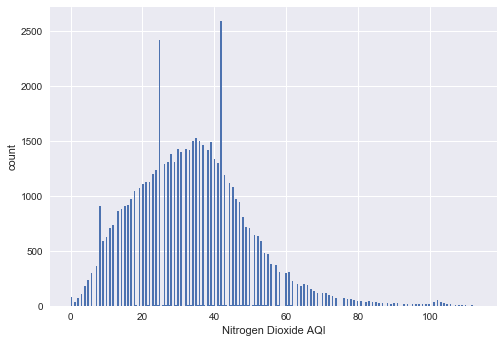

In [10]:
#Is the distribution of each pollutant normal?
sns.set()
n_data = len(top10.NO2_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(top10.NO2_AQI, bins = n_bins)
plt.xlabel('Nitrogen Dioxide AQI')
plt.ylabel('count')
plt.show()

In [11]:
import scipy.stats as stats
stats.normaltest(top10.NO2_AQI)

NormaltestResult(statistic=6342.9687468491948, pvalue=0.0)

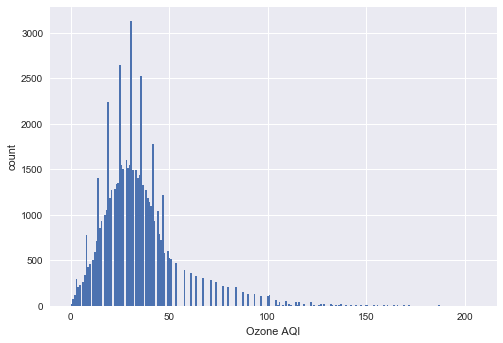

In [12]:
n_data = len(top10.O3_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(top10.O3_AQI, bins = n_bins)
plt.xlabel('Ozone AQI')
plt.ylabel('count')
plt.show()

In [13]:
import scipy.stats as stats
stats.normaltest(top10.O3_AQI)

NormaltestResult(statistic=29869.134575730037, pvalue=0.0)

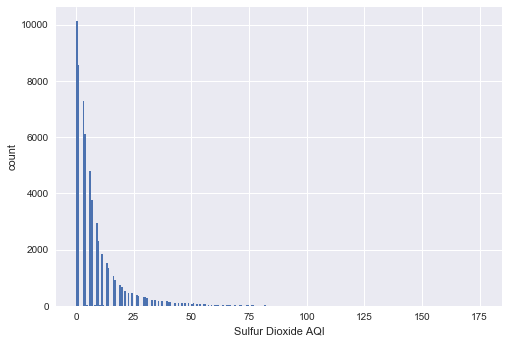

In [14]:
n_data = len(top10.SO2_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(top10.SO2_AQI, bins = n_bins)
plt.xlabel('Sulfur Dioxide AQI')
plt.ylabel('count')
plt.show()

In [15]:
import scipy.stats as stats
stats.normaltest(top10.SO2_AQI)

NormaltestResult(statistic=43339.51097640588, pvalue=0.0)

ValueError: max must be larger than min in range parameter.

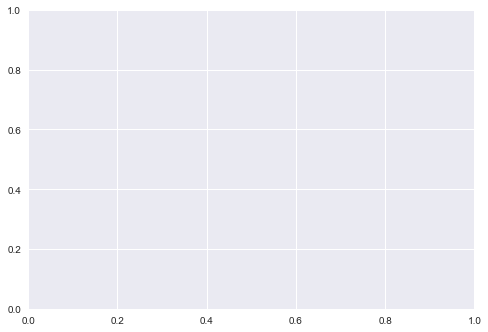

In [20]:
n_data = len(top10.CO_AQI)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(top10.CO_AQI, bins = n_bins)
plt.xlabel('Carbon Monoxide AQI')
plt.ylabel('count')
plt.show()

In [21]:
import scipy.stats as stats
stats.normaltest(top10.CO_AQI)

TypeError: normaltest() got an unexpected keyword argument 'skipna'

In [24]:
#Is there a significant difference between NY and LA?
NY_data = top10[top10['City'].str.contains('New York')]
LA_data = top10[top10['City'].str.contains('Los Angeles')]
print('Nitrogen Dioxide T-Test', stats.ttest_ind(NY_data.NO2_AQI, LA_data.NO2_AQI))
print('Sulfur Dioxide T-Test', stats.ttest_ind(NY_data.SO2_AQI, LA_data.SO2_AQI))
print('Ozone T-Test', stats.ttest_ind(NY_data.O3_AQI, LA_data.O3_AQI))
print('Carbon Monoxide T-Test', stats.ttest_ind(NY_data.CO_AQI, LA_data.CO_AQI))

Nitrogen Dioxide T-Test Ttest_indResult(statistic=-8.4398683065984947, pvalue=3.3809093584994887e-17)
Sulfur Dioxide T-Test Ttest_indResult(statistic=68.625375826728231, pvalue=0.0)
Ozone T-Test Ttest_indResult(statistic=-23.339117069847358, pvalue=5.8881357940871297e-119)
Carbon Monoxide T-Test Ttest_indResult(statistic=nan, pvalue=nan)
